In [4]:
# stdlib
import array
import struct

# numpy and friends
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.linear_model import (SGDClassifier)
from sklearn.metrics import accuracy_score


%matplotlib inline

In [5]:
# Constants
TEST_IMAGES_PATH = 't10k-images-idx3-ubyte'
TEST_LABELS_PATH = 't10k-labels-idx1-ubyte'
TRAIN_IMAGES_PATH = 'train-images-idx3-ubyte'
TRAIN_LABELS_PATH = 'train-labels-idx1-ubyte'

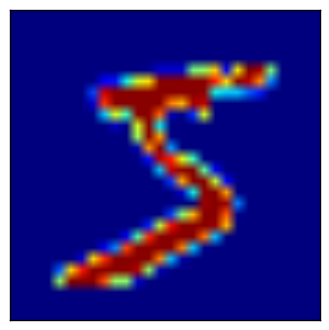

5


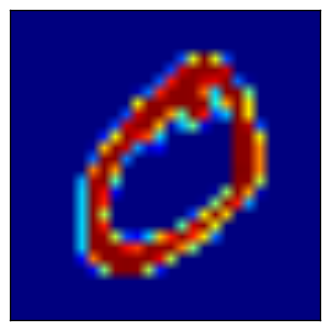

0


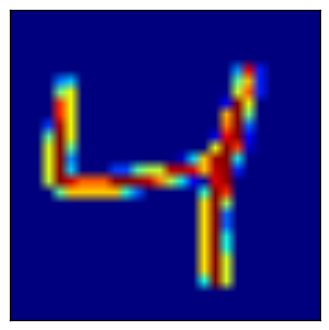

4


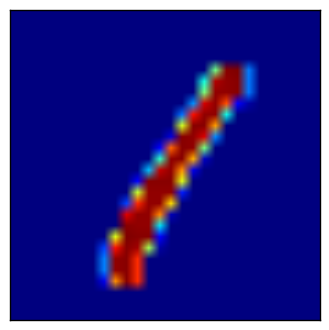

1


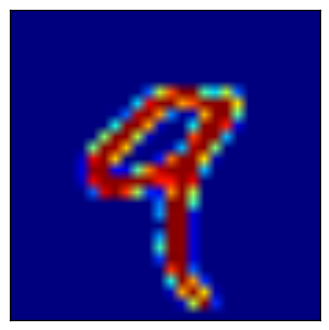

9


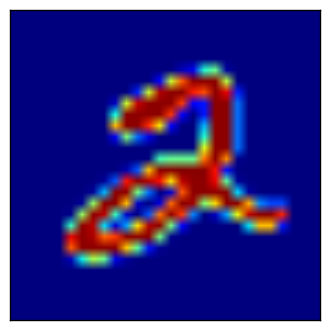

2


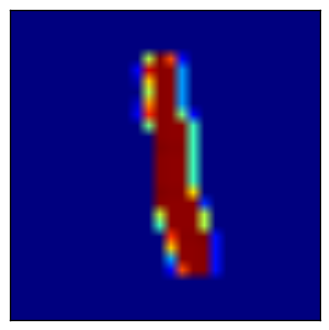

1


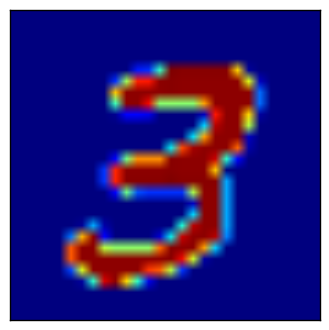

3


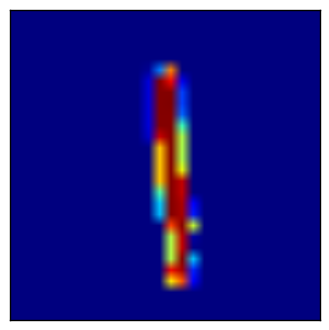

1


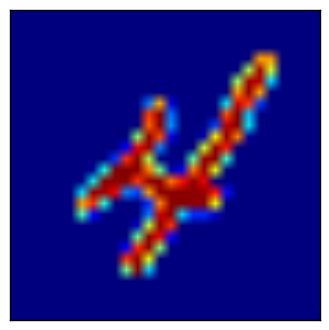

4


In [6]:
# I/O

def img_to_ascii(img, threshold=150):
    cols = 28
    ret = []
    for i, _ in enumerate(img):
        if i % cols == 0:
            ret.append('\n')
        if img[i] > threshold:
            ret.append('x')
        else:
            ret.append(' ')
    return ''.join(ret)

def load(path, imglbl):
    if imglbl == 'img':
        expected_magic = 2051
    elif imglbl == 'lbl':
        expected_magic = 2049
    else:
        raise ValueError('Unexpected value for imglbl. Expected one of [img|lbl]. Got: %s' % imglbl)
    
    with open(path, 'rb') as f:
        if imglbl == 'lbl':
            magic, size = struct.unpack(">II", f.read(8))
        else:
            magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
        if magic != expected_magic:
            raise ValueError('Bad magic number in %s. Exected [%s], but got [%s]' % (path, expected_magic, magic))

        raw_data = array.array("B", f.read())
    
    if imglbl == 'lbl':
        return raw_data
    
    ret = []
    for i in range(size):
        ret.append([0] * rows * cols)

    for i in range(size):
        ret[i][:] = raw_data[i * rows * cols:(i + 1) * rows * cols]

    return ret

train_images = load(TRAIN_IMAGES_PATH, 'img')
train_labels = load(TRAIN_LABELS_PATH, 'lbl')
test_images = load(TEST_IMAGES_PATH, 'img')
test_labels = load(TEST_LABELS_PATH, 'lbl')


for i in range(10):
    plt.imshow(np.array(train_images[i]).reshape(28, 28))
    plt.axes().get_xaxis().set_visible(False)
    plt.axes().get_yaxis().set_visible(False)
    plt.show()
    print train_labels[i]

In [85]:
classifier = SGDClassifier(loss='log')

# Train
X_train = np.array(train_images)
y_train = np.array(train_labels)
X_test = np.array(test_images)
y_test = np.array(test_labels)

classifier.fit(X_train, y_train)
accuracy_score(y_test, classifier.predict(X_test))


#classifier.coef_[0]
classifier.n_iter

5

In [79]:
classifier = SGDClassifier()
X_train = np.array([[-1, -1],
                    [1, 1]])

y = np.array([-1,
              1])
classifier.fit(X_train, y)


X_test = np.array([[5, -5.3]])
classifier.predict(X_test)

array([1])

array([1, 1])

In [15]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [2]:
X_train

NameError: name 'X_train' is not defined